In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import deconomix as dcx

In [3]:
X_ref = pd.read_pickle('../Data/Preprocessed/X_ref.pkl').astype(np.float64)
tcga_bulks = pd.read_pickle('../Data/Preprocessed/tcga_conv_norm.pkl').astype(np.float64)
tcga_subtypes = pd.read_csv('../Data/Preprocessed/tcga_subtype.csv').values.flatten()

In [4]:
tcga_LumA = tcga_bulks.iloc[:, tcga_subtypes == "LumA"]
tcga_LumB = tcga_bulks.iloc[:, tcga_subtypes == "LumB"]
tcga_Her2 = tcga_bulks.iloc[:, tcga_subtypes == "Her2"]
tcga_Basal = tcga_bulks.iloc[:, tcga_subtypes == "Basal"]

In [6]:
# Calculate gamma_ones per subtype
# this should be moved into the hps function itself (later)
gamma_ones_LumA = pd.DataFrame(1. / tcga_LumA.shape[1] * np.ones(tcga_bulks.shape[0]) / (tcga_LumA.mean(axis=1))**2,
                               dtype=np.float32,
                               columns=['gene weights'],
                               index=tcga_bulks.index)
                               
gamma_ones_LumB = pd.DataFrame(1. / tcga_LumB.shape[1] * np.ones(tcga_bulks.shape[0]) / (tcga_LumB.mean(axis=1))**2,
                               dtype=np.float32,
                               columns=['gene weights'],
                               index=tcga_bulks.index)

gamma_ones_Her2 = pd.DataFrame(1. / tcga_Her2.shape[1] * np.ones(tcga_bulks.shape[0]) / (tcga_Her2.mean(axis=1))**2,
                               dtype=np.float32,
                               columns=['gene weights'],
                               index=tcga_bulks.index)
gamma_ones_Basal = pd.DataFrame(1. / tcga_Basal.shape[1] * np.ones(tcga_bulks.shape[0]) / (tcga_Basal.mean(axis=1))**2,
                                dtype=np.float32,
                                columns=['gene weights'],
                                index=tcga_bulks.index)

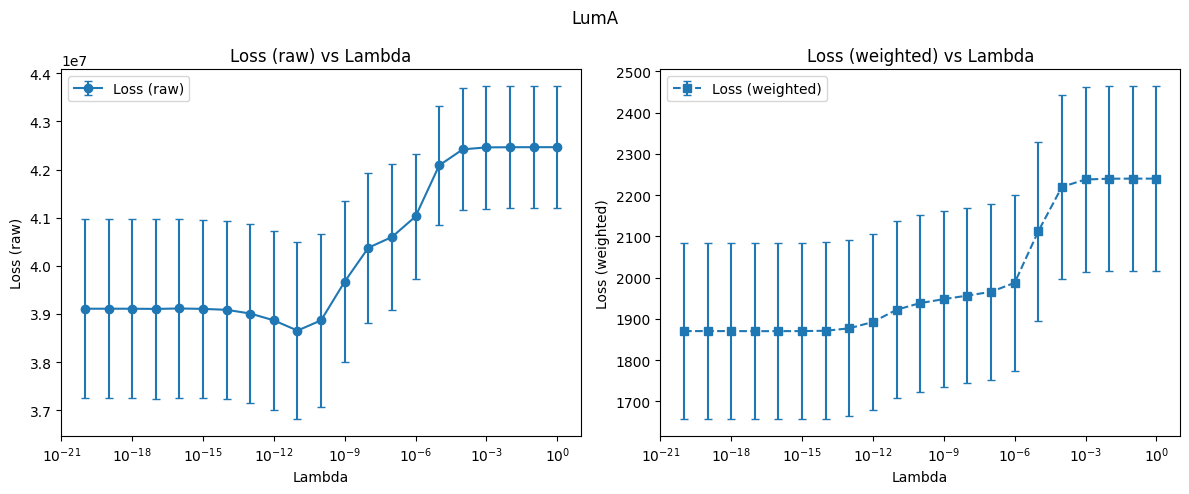

np.float64(1e-08)

In [ ]:
model_HPS_LumA = dcx.hps.HPS(X_ref, tcga_LumA, gamma_ones_LumA,
                             lambdas = np.logspace(-20, 0, num=21))
model_HPS_LumA.run(n_workers=50)
model_HPS_LumA.plot_results(title='LumA', path='../Outputs/HPS_LumA.png')#
model_HPS_LumA.get_lambda_1se()



In [ ]:
model_HPS_LumB = dcx.hps.HPS(X_ref, tcga_LumB, gamma_ones_LumB,
                             ambdas = np.logspace(-20, 0, num=21))
model_HPS_LumB.run(n_workers=50)
model_HPS_LumB.plot_results(title='LumB', path='../Outputs/HPS_LumB.png')
model_HPS_LumB.get_lambda_1se()

In [ ]:
model_HPS_Her2 = dcx.hps.HPS(X_ref, tcga_Her2, gamma_ones_Her2,
                             lambdas = np.logspace(-20, 0, num=21))
model_HPS_Her2.run(n_workers=50)
model_HPS_Her2.plot_results(title='Her2', path='../Outputs/HPS_Her2.png')
model_HPS_Her2.get_lambda_1se()

In [ ]:
model_HPS_Basal = dcx.hps.HPS(X_ref, tcga_Basal, gamma_ones_Basal,
                  lambdas = np.logspace(-20, 0, num=21))
model_HPS_Basal.run(n_workers=50)
model_HPS_Basal.plot_results(title='Basal', path='../Outputs/HPS_Basal.png')
model_HPS_Basal.get_lambda_1se()


Preparing Job List
Preparing Baseline Model


  0%|          | 0/1000 [00:00<?, ?it/s]

Running jobs:  87%|████████▋ | 91/105 [12:32<01:55,  8.26s/it]  Process ForkPoolWorker-96:
Process ForkPoolWorker-86:
Process ForkPoolWorker-91:
Process ForkPoolWorker-72:
Process ForkPoolWorker-78:
Process ForkPoolWorker-100:
Process ForkPoolWorker-90:
Process ForkPoolWorker-53:
Process ForkPoolWorker-62:
Process ForkPoolWorker-84:
Process ForkPoolWorker-74:
Process ForkPoolWorker-99:
Process ForkPoolWorker-80:
Process ForkPoolWorker-67:
Process ForkPoolWorker-77:
Process ForkPoolWorker-60:
Process ForkPoolWorker-71:
Process ForkPoolWorker-58:
Process ForkPoolWorker-64:
Process ForkPoolWorker-61:
Process ForkPoolWorker-89:
Process ForkPoolWorker-65:
Process ForkPoolWorker-68:
Process ForkPoolWorker-93:
Process ForkPoolWorker-54:
Process ForkPoolWorker-51:
Process ForkPoolWorker-57:
Process ForkPoolWorker-87:
Process ForkPoolWorker-76:
Process ForkPoolWorker-79:
Process ForkPoolWorker-85:
Process ForkPoolWorker-88:
Process ForkPoolWorker-55:
Process ForkPoolWorker-69:
Process ForkPoolW

: 

The final results for the different datasets are:

- LumA: 1e-08
- LumB: 1e-10
- Her2: 1e-07
- Basal: 1e-07